# Customer Segmentation Using KMeans

In [1]:
# Import the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [2]:
# Loading the dataset
df= pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
# Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


We're having numerical variables except Gender which is a categorical variable.

In [5]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Missing Values

In [8]:
# Checking for Missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no missing values in this dataset. So lets move on to Exploratory Data Analysis

## EDA

In [9]:
# Detect outliers using Z-score
from scipy import stats
z_scores = stats.zscore(df['Annual Income (k$)'])
outlier_indices = np.where(np.abs(z_scores) > 2)[0]

outlier_indices

array([192, 193, 194, 195, 196, 197, 198, 199])

In [10]:
# Quartile Method (IQR)
df2 = df.select_dtypes(exclude = 'object')
Q1 = np.percentile(df2, 25)
Q3 = np.percentile(df2, 75)
IQR = Q3 - Q1
print("Outliers (Quartile Method):", df2[(df2 < Q1 - 1.5 * IQR) | (df2 > Q3 + 1.5 * IQR)])

Outliers (Quartile Method):      CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
0           NaN  NaN                 NaN                     NaN
1           NaN  NaN                 NaN                     NaN
2           NaN  NaN                 NaN                     NaN
3           NaN  NaN                 NaN                     NaN
4           NaN  NaN                 NaN                     NaN
..          ...  ...                 ...                     ...
195       196.0  NaN                 NaN                     NaN
196       197.0  NaN                 NaN                     NaN
197       198.0  NaN                 NaN                     NaN
198       199.0  NaN                 NaN                     NaN
199       200.0  NaN                 NaN                     NaN

[200 rows x 4 columns]


In [11]:
P1 = np.percentile(df['Annual Income (k$)'], 1)
P99 = np.percentile(df['Annual Income (k$)'], 99)
# print("Outliers (Percentile):", df[(df < P1) | (df > P99)])

P1

np.float64(15.99)

<Axes: xlabel='Annual Income (k$)'>

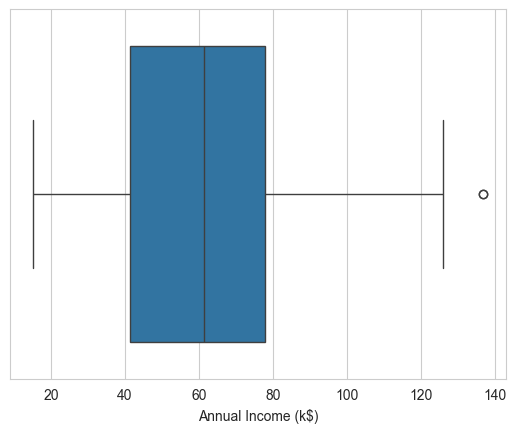

In [12]:
#plotting boxplot to see outliers
sns.boxplot(x='Annual Income (k$)',data = df, orient='h')

<Axes: xlabel='Spending Score (1-100)'>

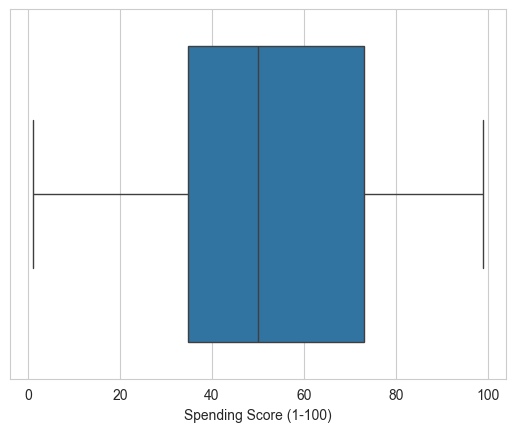

<Axes: xlabel='Age'>

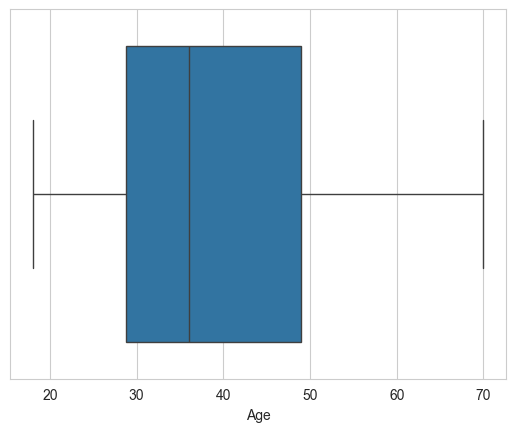

In [14]:
sns.boxplot(x='Age',data = df, orient='h')

In [15]:
df.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

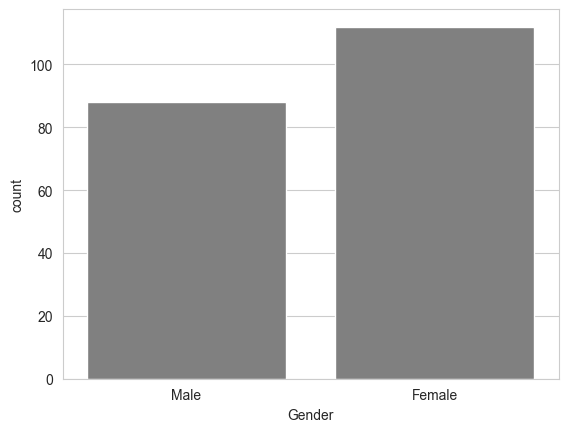

In [16]:
sns.countplot(x = 'Gender', data= df, color = 'grey')

([<matplotlib.patches.Wedge at 0x20a1627e3c0>,
 [Text(-0.20611944741983823, 1.0805159755391591, 'Female'),
  Text(0.20611954188154788, -1.08051595751962, 'Male')],
 [Text(-0.11242878950172994, 0.5893723502940867, '56.0%'),
  Text(0.11242884102629883, -0.5893723404652471, '44.0%')])

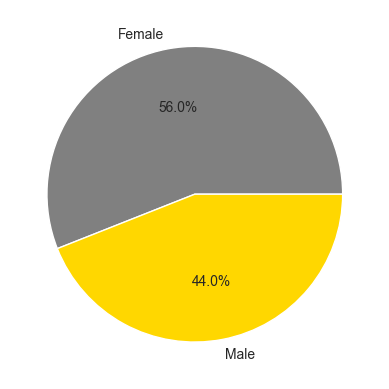

In [17]:
plt.pie(df['Gender'].value_counts(), 
        labels=(df.Gender.value_counts().index), 
        autopct=('%1.1f%%'),
        colors = ['grey', 'gold']
    )

In [18]:
def age_bracket(x):
    if x <= 25:
        return '18-25'
    elif x <= 35:
        return '26-35'
    elif x <= 45:
        return '36-45'
    elif x <= 55:
        return '46-55'
    elif x <= 65:
        return '56-65'
    else:
        return '>65'
    
df['Age_Bracket'] = df['Age'].apply(age_bracket)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Bracket
0,1,Male,19,15,39,18-25
1,2,Male,21,15,81,18-25
2,3,Female,20,16,6,18-25
3,4,Female,23,16,77,18-25
4,5,Female,31,17,40,26-35


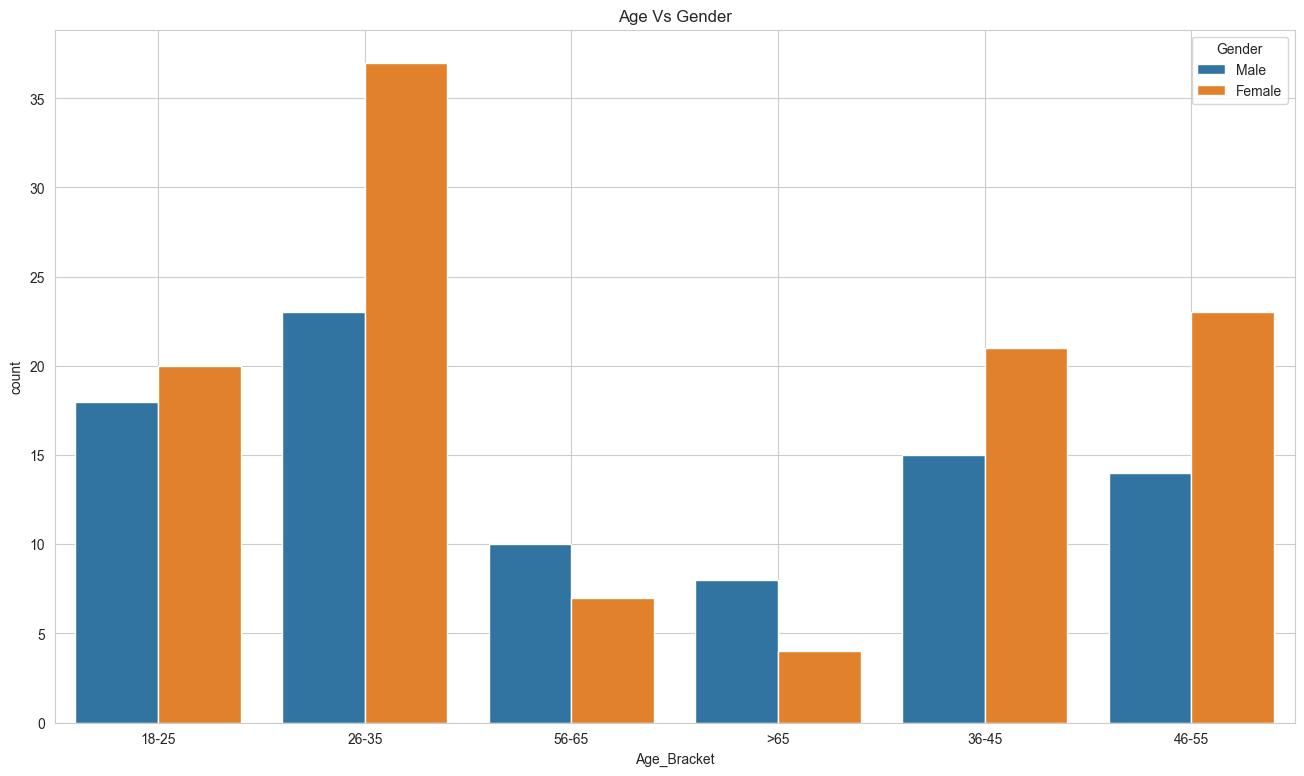

In [19]:
plt.figure(figsize=(16,9))
sns.countplot(x = df['Age_Bracket'], hue = df['Gender'], data = df)
plt.xticks(rotation=0)
plt.title("Age Vs Gender")
plt.grid('None')

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

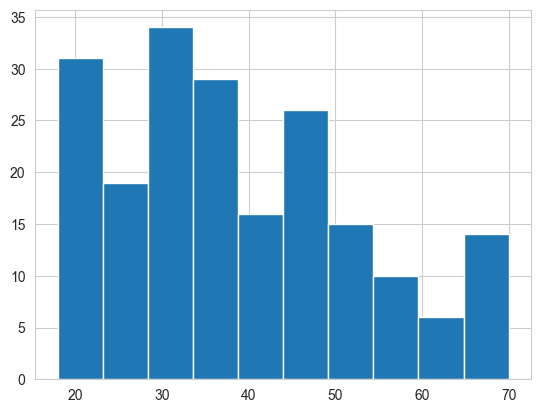

In [20]:
plt.hist(df['Age'])

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

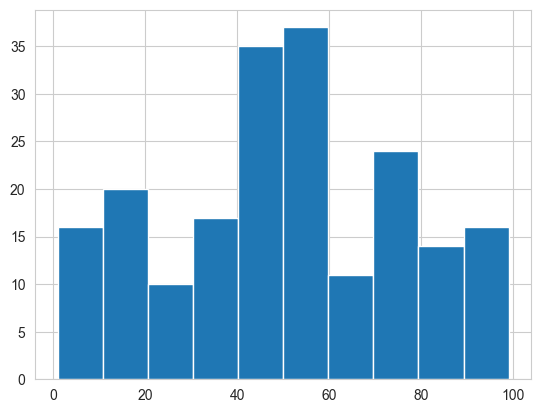

In [21]:
plt.hist(df['Spending Score (1-100)'])

Text(0.5, 1.0, 'SPENDING SCORE (1-100) VS GENDER')

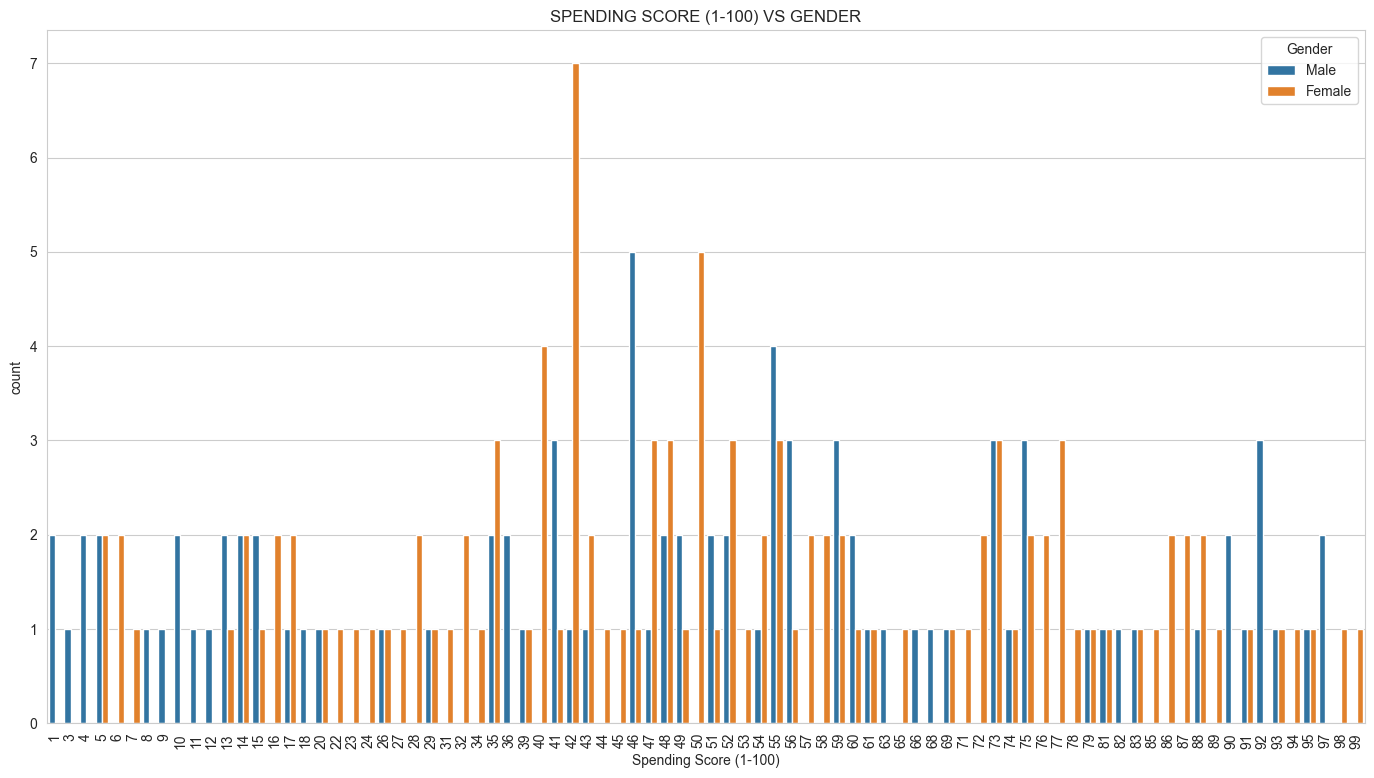

In [22]:
plt.figure(figsize=(17,9))
sns.countplot(x = 'Spending Score (1-100)', hue= 'Gender', data= df)
plt.xticks(rotation=90)
plt.title("SPENDING SCORE (1-100) VS GENDER")

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <BarContainer object of 10 artists>)

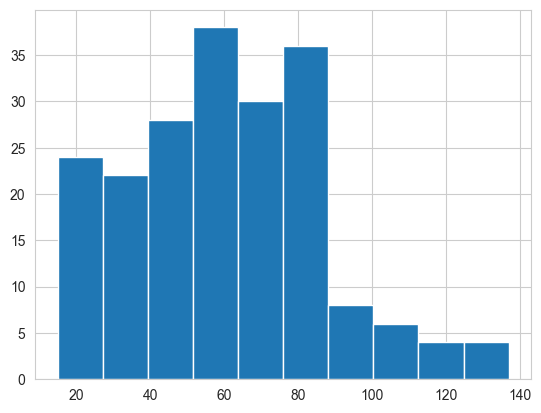

In [23]:
plt.hist(df['Annual Income (k$)'])

Text(0.5, 1.0, 'ANNUAL INCOME (k$) VS GENDER')

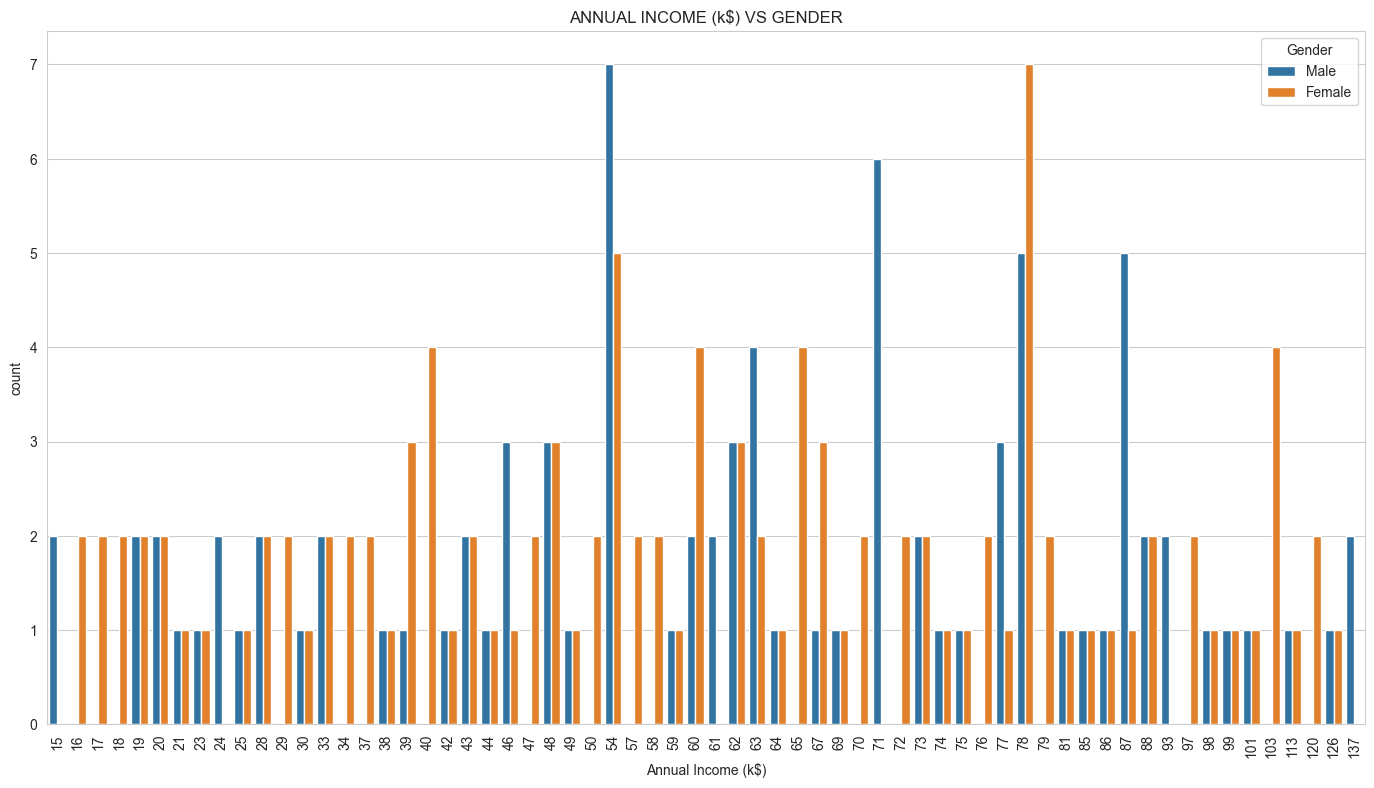

In [24]:
plt.figure(figsize=(17,9))
sns.countplot(x = 'Annual Income (k$)', hue= 'Gender', data= df)
plt.xticks(rotation=90)
plt.title("ANNUAL INCOME (k$) VS GENDER")

Let's take a look at the Relationship between these Variables

Text(0.5, 1.0, 'Relationships between Variable')

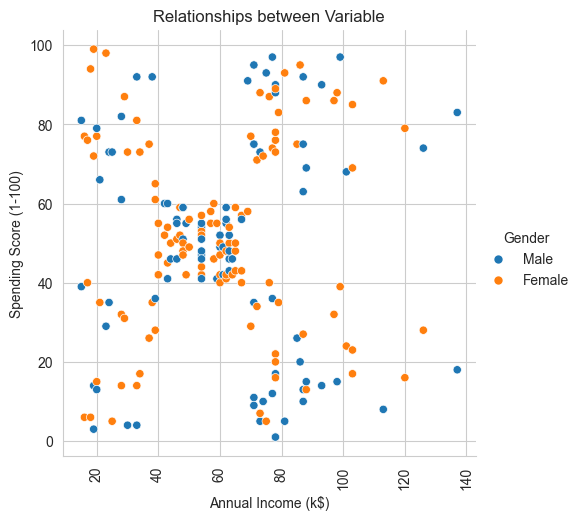

In [25]:
sns.relplot(x = ("Annual Income (k$)"), y = ("Spending Score (1-100)"), hue = 'Gender', data = df)
plt.xticks(rotation=90)
plt.title("Relationships between Variable")

Let's look at the correlation features

In [26]:
# Converting the Gender object type to numeric
# Male=1 and Female=0
df['Gender'] = df.Gender.astype('category').cat.codes

In [27]:
corr = df.drop(['Age_Bracket'], axis = 1).corr()
corr

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


<Axes: >

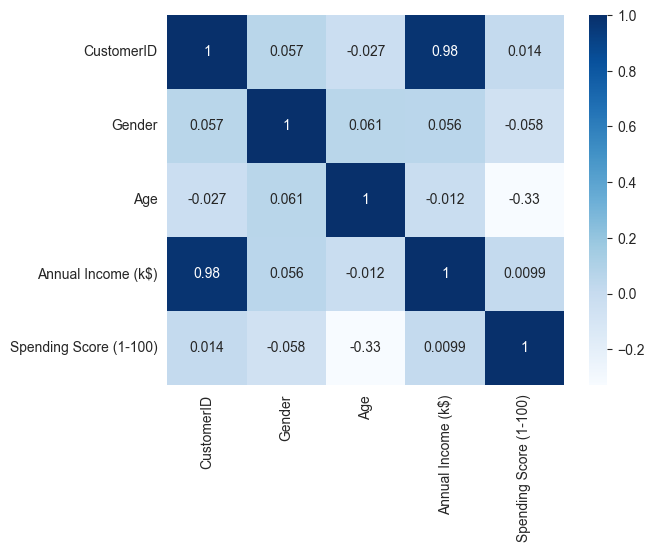

In [28]:
sns.heatmap(corr, 
            xticklabels = corr.columns, 
            yticklabels = corr.columns, 
            annot = True,
            cmap = 'Blues'
            )

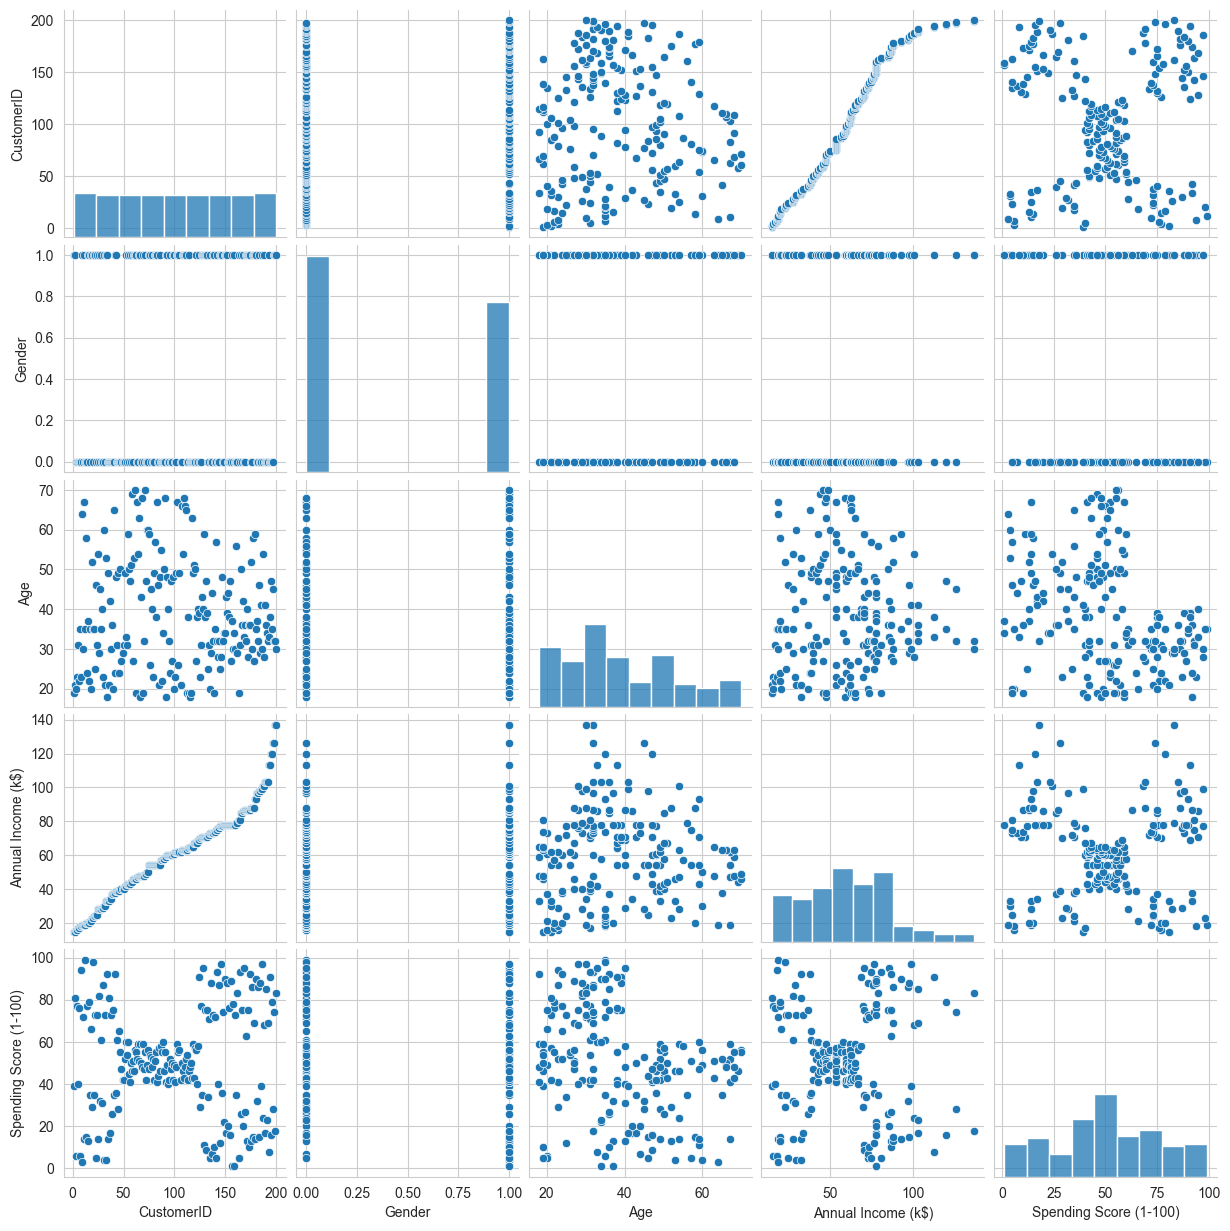

In [29]:
sns.pairplot(df)

## Customer Segmentation

Let's divide this variables into dependent variables and independent variable

In [30]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Bracket
0,1,1,19,15,39,18-25
1,2,1,21,15,81,18-25
2,3,0,20,16,6,18-25
3,4,0,23,16,77,18-25
4,5,0,31,17,40,26-35


In [31]:
X = df.iloc[: ,2:4].values
y = df.iloc[: , 4].values

In [32]:
print(f'Shape of X is {X.shape[0]} rows and {X.shape[1]} columns')
print(f'Shape of y is {y.shape[0]} rows')

Shape of X is 200 rows and 2 columns
Shape of y is 200 rows


## Clustering

In [33]:
from sklearn.cluster import KMeans
wcss = []

In [34]:
for i in range(1,11):
    Kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

In [35]:
wcss

[176108.78000000003,
 87121.56591478697,
 59525.857573798756,
 39928.037584630714,
 31684.115125448032,
 25460.54737191027,
 23252.41242276815,
 18837.03283631573,
 16012.46958781594,
 14032.689360712387]

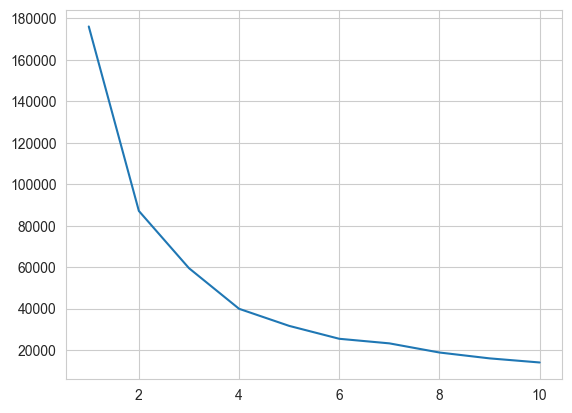

In [36]:
plt.plot(range(1,11), wcss)

### Model Build

In [37]:
kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = kmeans_model.fit_predict(X)

In [38]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 3, 3, 3, 1, 3, 3, 3, 0, 3, 3, 3,
       1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int32)

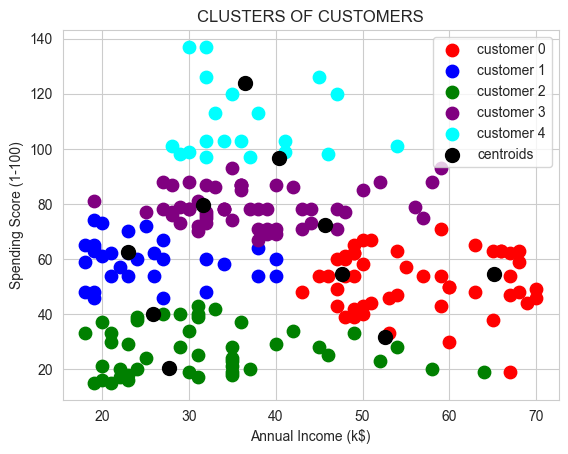

In [39]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=80, c='red', label='customer 0')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=80, c= 'blue', label='customer 1')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=80, c='green', label='customer 2')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s=80, c='purple', label='customer 3')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s=80, c='cyan', label='customer 4')
plt.scatter(Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:,1], s=100, c='black', label='centroids')
plt.title('CLUSTERS OF CUSTOMERS')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

In [40]:
result = pd.DataFrame({'label': y_kmeans})
final_result = pd.concat([df, result], axis = 1)
final_result

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Bracket,label
0,1,1,19,15,39,18-25,2
1,2,1,21,15,81,18-25,2
2,3,0,20,16,6,18-25,2
3,4,0,23,16,77,18-25,2
4,5,0,31,17,40,26-35,2
...,...,...,...,...,...,...,...
195,196,0,35,120,79,26-35,4
196,197,0,45,126,28,36-45,4
197,198,1,32,126,74,26-35,4
198,199,1,32,137,18,26-35,4


In [41]:
final_result['label'].value_counts()

label
3    54
0    50
2    45
1    31
4    20
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

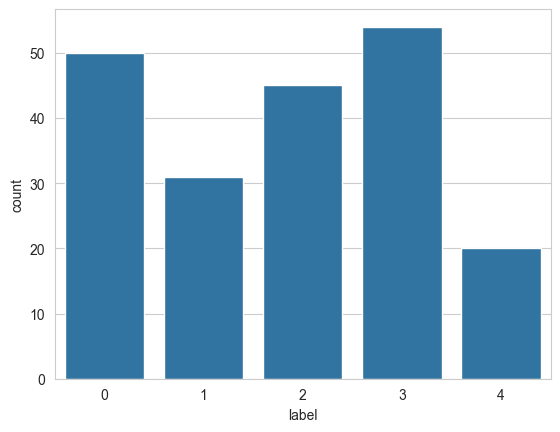

In [42]:
sns.countplot(x = final_result['label'], data = final_result)

<Axes: xlabel='label', ylabel='count'>

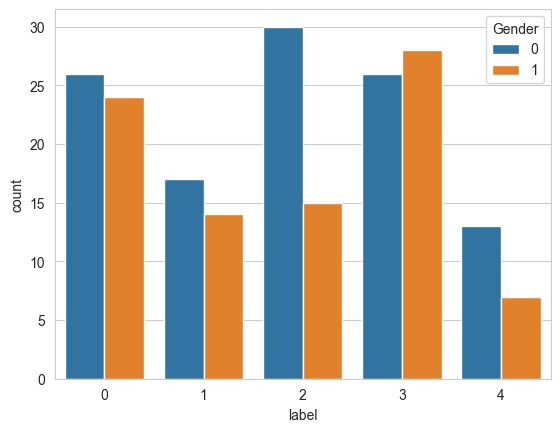

In [43]:
sns.countplot(x = final_result['label'], 
              hue = final_result['Gender'],
              data = final_result)